# COVID-19 Time Series
This tutorial will visualize COVID-19 data as a time series, and along the way, show what a workflow might look like when using ahlive.

Click [here](covid_19_time_series.ipynb#final-animation) to see the full animation.

### load data

To start, we will import ahlive and abbrieviate as `ah`. Then, we open up the COVID-19 global cases dataset and display it.

`raw` is set to `True` for demonstration purposes, i.e. how to preprocess a "wide" dataset into a "tidy" dataset (this is done automatically if `raw=False`).

`verbose` is set to `True` to display the direct URL where the data is retrieved from, in addition to the source and base URL.

In [1]:
import ahlive as ah
import pandas as pd
df = ah.tutorial.open_dataset('covid19_global_cases', raw=True, verbose=True)
display(df)

COVID19 GLOBAL CASES | Source: JHU CSSE COVID-19 | https://github.com/CSSEGISandData/COVID-19
Data: https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv


Province/State      Country/Region        Lat        Long  1/22/20  \
0              NaN         Afghanistan  33.939110   67.709953        0   
1              NaN             Albania  41.153300   20.168300        0   
2              NaN             Algeria  28.033900    1.659600        0   
3              NaN             Andorra  42.506300    1.521800        0   
4              NaN              Angola -11.202700   17.873900        0   
..             ...                 ...        ...         ...      ...   
274            NaN             Vietnam  14.058324  108.277199        0   
275            NaN  West Bank and Gaza  31.952200   35.233200        0   
276            NaN               Yemen  15.552727   48.516388        0   
277            NaN              Zambia -13.133897   27.849332        0   
278            NaN            Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  10/11/21  10/12/21  \
0          0        0        0        0        0  ...    155540    155599   
1          0        0        0        0        0  ...    175163    175664   
2          0        0        0        0        0  ...    204695    204790   
3          0        0        0        0        0  ...     15307     15307   
4          0        0        0        0        0  ...     61580     61794   
..       ...      ...      ...      ...      ...  ...       ...       ...   
274        2        2        2        2        2  ...    843281    846230   
275        0        0        0        0        0  ...    443766    444729   
276        0        0        0        0        0  ...      9402      9412   
277        0        0        0        0        0  ...    209353    209396   
278        0        0        0        0        0  ...    131875    132016   

     10/13/21  10/14/21  10/15/21  10/16/21  10/17/21  10/18/21  10/19/21  \
0      155627    155682    155688    155739    155764    155776    155801   
1      176172    176667    177108    177536    177971    178188    178804   
2      204900    205005    205106    205199    205286    205364    205453   
3       15314     15326     15338     15338     15338     15367     15369   
4       62143     62385     62606     62789     62842     63012     63197   
..        ...       ...       ...       ...       ...       ...       ...   
274    849691    853842    857639    860860    864053    867221    870255   
275    445538    446294    447032    447032    447032    448322    449031   
276      9439      9467      9495      9512      9526      9556      9575   
277    209411    209431    209477    209505    209521    209536    209549   
278    132108    132251    132285    132333    132368    132368    132405   

     10/20/21  
0      155859  
1      179463  
2      205529  
3       15382  
4       63340  
..        ...  
274    873901  
275    449705  
276      9596  
277    209571  
278    132437  

[279 rows x 642 columns]

### transform data

This data is in `wide` form, but ahlive expects input data to be in "tidy" form, which is defined below:

1. Each variable must have its own column.
2. Each observation must have its own row.
3. Each type of observational unit forms a table.

Fortunately, it's easy to convert to "tidy" form using `pd.melt`.

In [2]:
df_tidy = df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
    var_name='Date', value_name='Cases')
display(df_tidy)

Province/State      Country/Region        Lat        Long      Date  \
0                 NaN         Afghanistan  33.939110   67.709953   1/22/20   
1                 NaN             Albania  41.153300   20.168300   1/22/20   
2                 NaN             Algeria  28.033900    1.659600   1/22/20   
3                 NaN             Andorra  42.506300    1.521800   1/22/20   
4                 NaN              Angola -11.202700   17.873900   1/22/20   
...               ...                 ...        ...         ...       ...   
177997            NaN             Vietnam  14.058324  108.277199  10/20/21   
177998            NaN  West Bank and Gaza  31.952200   35.233200  10/20/21   
177999            NaN               Yemen  15.552727   48.516388  10/20/21   
178000            NaN              Zambia -13.133897   27.849332  10/20/21   
178001            NaN            Zimbabwe -19.015438   29.154857  10/20/21   

         Cases  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
177997  873901  
177998  449705  
177999    9596  
178000  209571  
178001  132437  

[178002 rows x 6 columns]

### subset data

Now, we can now use this "tidy" `pd.DataFrame` with ahlive. However, oftentimes it's best to subset and focus on a few datapoints, and also for this tutorial's simplicity sake.

In [3]:
countries = ['US', 'China', 'New Zealand', 'United Kingdom',
             'Brazil', 'India', 'Zambia', 'Pakistan']
df_subset = df_tidy.loc[df_tidy['Country/Region'].isin(countries)]
display(df_subset)

Province/State  Country/Region  \
30                                               NaN          Brazil   
58                                             Anhui           China   
59                                           Beijing           China   
60                                         Chongqing           China   
61                                            Fujian           China   
...                                              ...             ...   
177989                                    Montserrat  United Kingdom   
177990  Saint Helena, Ascension and Tristan da Cunha  United Kingdom   
177991                      Turks and Caicos Islands  United Kingdom   
177992                                           NaN  United Kingdom   
178000                                           NaN          Zambia   

              Lat        Long      Date    Cases  
30     -14.235000  -51.925300   1/22/20        0  
58      31.825700  117.226400   1/22/20        1  
59      40.182400  116.414200   1/22/20       14  
60      30.057200  107.874000   1/22/20        6  
61      26.078900  117.987400   1/22/20        1  
...           ...         ...       ...      ...  
177989  16.742498  -62.187366  10/20/21       41  
177990  -7.946700  -14.355900  10/20/21        4  
177991  21.694000  -71.797900  10/20/21     2941  
177992  55.378100   -3.436000  10/20/21  8589737  
178000 -13.133897   27.849332  10/20/21   209571  

[33814 rows x 6 columns]

Since this dataset was originally grouped by `Province/State`s, to further simplify and reduce crowdedness, we can group by `Country/Region` instead.

In [4]:
df_countries = df_subset.groupby(['Date', 'Country/Region'])[['Cases']].sum().reset_index()
display(df_countries)

Date  Country/Region     Cases
0     1/1/21          Brazil   7700578
1     1/1/21           China     96023
2     1/1/21           India  10325823
3     1/1/21     New Zealand      2162
4     1/1/21        Pakistan    484362
...      ...             ...       ...
5099  9/9/21     New Zealand      3867
5100  9/9/21        Pakistan   1197887
5101  9/9/21              US  40733593
5102  9/9/21  United Kingdom   7165200
5103  9/9/21          Zambia    207560

[5104 rows x 3 columns]

### serialize data

Pass the preprocessed `pd.DataFrame`, the `xs` column name (what we want plotted on the x-axis), the `ys` column name (what we want plotted on the y-axis) to instantiate the `ah.DataFrame` class.

In [5]:
ah_df = ah.DataFrame(df_countries, 'Date', 'Cases')
print(ah_df)

<ahlive.Data>
Subplot:         (1, 1)
Dimensions:      (item: 1, state: 5104)
Data variables:
    x        (item, state) object '1/1/21' '1/1/21' ... '9/9/21' '9/9/21'
    y        (item, state) float64 7.701e+06 9.602e+04 ... 7.165e+06 2.076e+05
    chart    (item) <U4 'line'
    label    (item, state) <U1 '' '' '' '' '' '' '' '' ... '' '' '' '' '' '' ''
    group    (item) <U1 ''
    interp   (item) <U6 'linear'
    ease     (item) <U6 'in_out'
Attributes (3/47):
    margins_kwds {'x': 0.0, 'y': 0.0}
    xlabel_kwds  {'xlabel': 'Date'}
    ylabel_kwds  {'ylabel': 'Cases'}




/mnt/c/Users/sephi/GOOGLE~1/Bash/ahlive/ahlive/data.py:2117: UserWarning: Found more than 5104 states which may take a considerable time to animate; set label to group a set of rows as separate items.
  f"Found more than {num_states} states "


However, if we examine the output, we notice an abnormally large number of `state`s, or number of frames in the animation, and only 1 `item`. In other words, ahlive is unaware of the different `Country/Region`s; thus we need to pass that in as the `label`.

In [6]:
ah_df = ah.DataFrame(df_countries, 'Date', 'Cases', label='Country/Region')
print(ah_df)

<ahlive.Data>
Subplot:         (1, 1)
Dimensions:      (item: 8, state: 638)
Data variables:
    x        (item, state) object '1/1/21' '1/10/21' ... '9/9/20' '9/9/21'
    y        (item, state) float64 7.701e+06 8.106e+06 ... 1.311e+04 2.076e+05
    chart    (item) <U4 'line' 'line' 'line' 'line' 'line' 'line' 'line' 'line'
    label    (item, state) object 'Brazil' 'Brazil' ... 'Zambia' 'Zambia'
    group    (item) <U2 '' '' '' '' '' '' '' ''
    interp   (item) <U6 'linear' 'linear' 'linear' ... 'linear' 'linear'
    ease     (item) <U6 'in_out' 'in_out' 'in_out' ... 'in_out' 'in_out'
Attributes (3/47):
    margins_kwds {'x': 0.0, 'y': 0.0}
    xlabel_kwds  {'xlabel': 'Date'}
    ylabel_kwds  {'ylabel': 'Cases'}




With that done, we can *almost* generate the the first animation by calling the `render` method, but before doing so, it's good to set `animate` to a list of `state`s. This limits the number of frames in the animation so we can get a preview of what the full animation looks like and ensure everything looks correct. We can also specify `fps` to prevent the animation from flashing.

[########################################] | 100% Completed |  5.9s



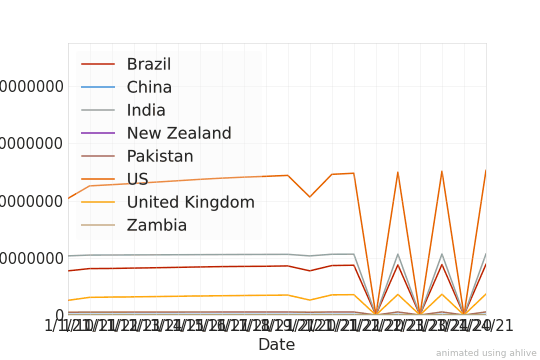

In [7]:
ah_df = ah.DataFrame(df_countries, 'Date', 'Cases', label='Country/Region',
                     animate=[20, 50, 250, 300], fps=1)
ah_df.render()

### tweak animation

By doing so, we can immediately notice that:

1. The `ylabel` is cut-off.
2. The dates are crowded and not sorted.
3. COVID tests did not start until March.
4. it's hard to intuitively grasp the large numbers.
5. The legend isn't sorted by max.

To remedy this:

1. Increase the width of the figure through `figsize`.
2. Replace date `str`s with `np.datetime64` objects.
3. Slice dataframe to begin around March.
4. Scale the values by a million (`1e6`) and rerun.
5. Set `sortby='y'` in config.

Also, to reduce the size of this tutorial page, we will subsample March 2020 to August 2021 and resample to every week.

In [8]:
df_dts = df_countries.copy()
df_dts['Date'] = pd.to_datetime(df_dts['Date'])
df_dts = df_dts.loc[
    (df_dts['Date'] >= '2020-03-01') &
    (df_dts['Date'] <= "2020-08-31")
]
df_dts = df_dts.groupby([
    pd.Grouper(key='Date', freq='7D'), 'Country/Region'
])['Cases'].last().reset_index()
df_scale = df_dts.sort_values('Date')
df_scale['Cases'] /= 1e6

We can rerun with the newly preprocessed `pd.DataFrame`. We can also use any `str` in `animate` for a subset. It will also automatically set `fps`.

[########################################] | 100% Completed |  3.0s



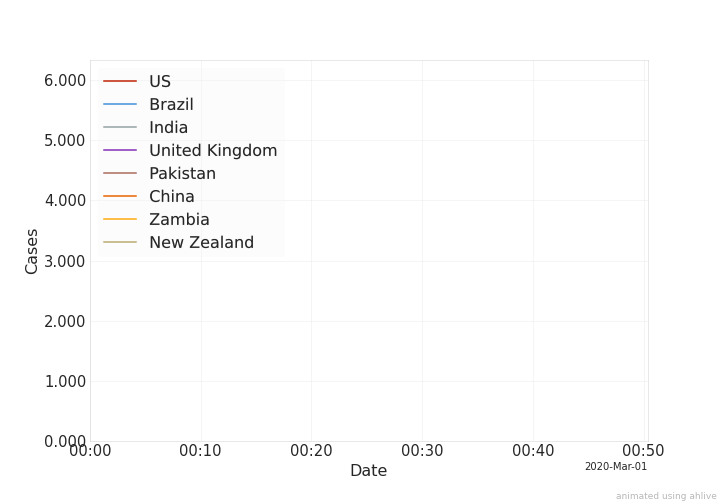

In [9]:
ah_df = ah.DataFrame(
    df_scale, 'Date', 'Cases', label='Country/Region',
    figsize=(10, 7), animate='test'
).config('legend', sortby='y')
ah_df.render()

We now note that there are extraneous decimal points so we can use `config` to set the `format`. We may also want to add `state_labels` and `inline_labels` to see directly see the x and y values.

[########################################] | 100% Completed |  3.7s



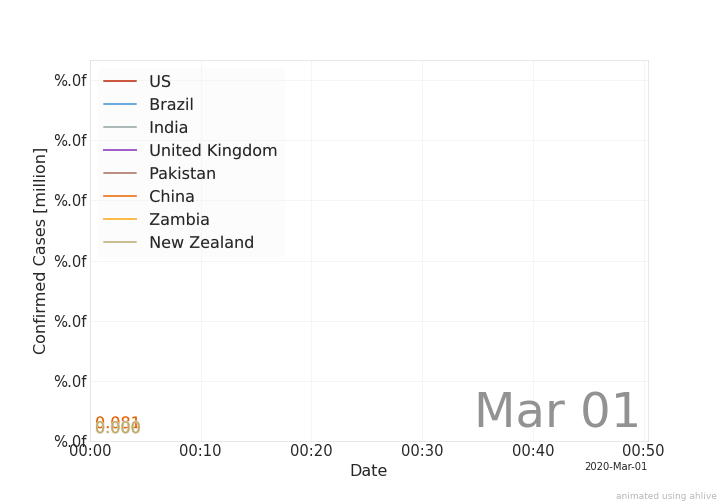

In [10]:
ah_df = ah.DataFrame(
    df_scale, 'Date', 'Cases', label='Country/Region',
    state_labels='Date', inline_labels='Cases',
    figsize=(10, 7), ylabel='Confirmed Cases [million]',
    animate='test'
).config('yticks', format='%.0f').config('legend', sortby='y')
ah_df.render()

We can also set `animate` as `head_28` to animate the first 28 frames.

[####                                    ] | 11% Completed |  1.2s

/mnt/c/Users/sephi/GOOGLE~1/Bash/ahlive/ahlive/animation.py:1602: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 12.
  plt.savefig(buf, **savefig_kwds)


[########################################] | 100% Completed |  8.3s



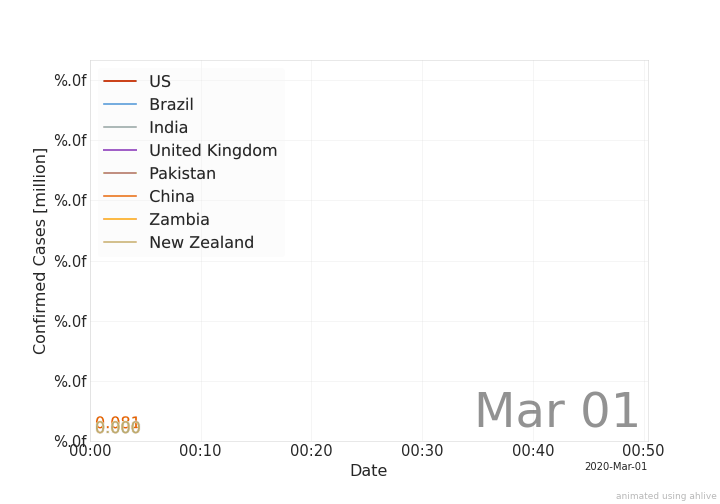

In [11]:
ah_df = ah.DataFrame(
    df_scale, 'Date', 'Cases', label='Country/Region',
    state_labels='Date', inline_labels='Cases',
    figsize=(10, 7), ylabel='Confirmed Cases [million]',
    animate='head_28'
).config('yticks', format='%.0f').config('legend', sortby='y')
ah_df.render()

Since there's not much to see in the first 28 frames, we can also animate from the tail using `tail_28`.

[########################################] | 100% Completed | 11.5s



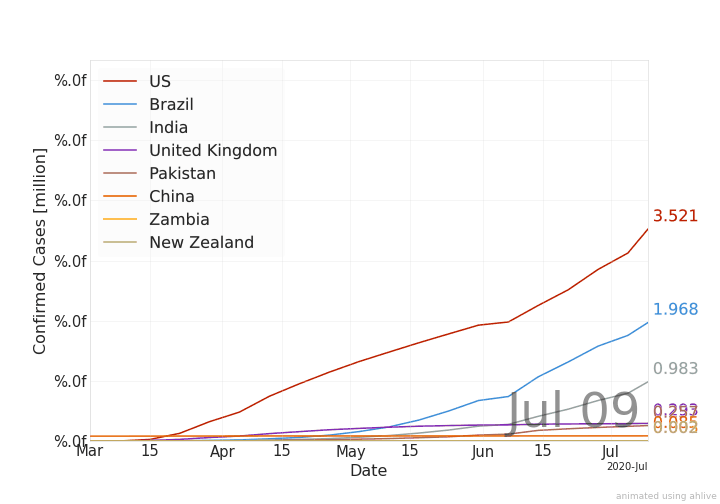

In [12]:
ah_df = ah.DataFrame(
    df_scale, 'Date', 'Cases', label='Country/Region',
    state_labels='Date', inline_labels='Cases',
    figsize=(10, 7), ylabel='Confirmed Cases [million]',
    animate='tail_28'
).config('yticks', format='%.0f').config('legend', sortby='y')
ah_df.render()

### cascade data

It looks decent for the most part, but there's too much going on to easily garner any insights from it and there's a lot of crowding near the bottom. We can utilize `join='cascade'` to see country by country. Also, the plot can be a bit misleading because New Zealand has a much smaller population than US so we should try normalizing by population.

In [13]:
df_pop = ah.tutorial.open_dataset('covid19_population')[['combined_key', 'population']]
df_norm = df_scale.merge(df_pop, left_on='Country/Region', right_on='combined_key')
df_norm['Cases'] = df_norm['Cases'] * 1e6 / df_norm['population']  # previously scaled by 1 million
df_norm['Cases'] *= 1e5  # scale by per 100k people

COVID19 POPULATION | Source: JHU CSSE COVID-19 | https://github.com/CSSEGISandData/COVID-19


After updating the `ylabel` to reflect the normalization, we should once again animate a few frames to see if everything looks alright.

[#########################               ] | 63% Completed |  1.9s

/mnt/c/Users/sephi/GOOGLE~1/Bash/ahlive/ahlive/animation.py:1372: UserWarning: Attempting to set identical left == right == 18322.0 results in singular transformations; automatically expanding.
  getattr(ax, f"set_{axis}lim")(to_pydt(axis_lim0, axis_lim1))


[########################################] | 100% Completed |  3.0s



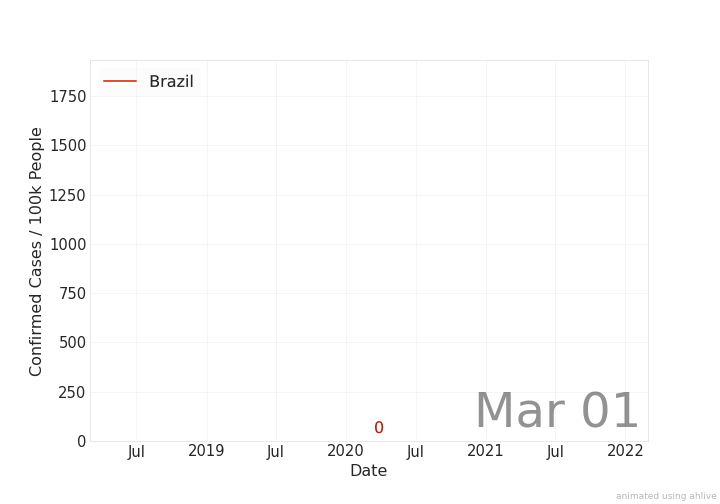

In [14]:
ah_df = ah.DataFrame(
    df_norm, 'Date', 'Cases', label='Country/Region',
    state_labels='Date', inline_labels='Cases',
    figsize=(10, 7), ylabel='Confirmed Cases / 100k People',
    join='cascade', animate='test'
).config('legend', sortby='y')
ah_df.render()

Looks mostly good, but the lines do not appear in a pleasing manner even with `sortby='y'` and the fixed `ylims` is not ideal. We can first sort the dataframe manually.

In [15]:
ordering = df_norm.groupby('Country/Region').max().sort_values('Cases').index
df_sort = df_norm.copy()
df_sort['Country/Region'] = pd.Categorical(
    df_sort['Country/Region'], categories=ordering, ordered=True)
df_sort = df_sort.sort_values(['Country/Region', 'Date'])

Then set `ylims` to explore to take full advantage of the `cascade`.

[########################################] | 100% Completed |  3.5s


/mnt/c/Users/sephi/GOOGLE~1/Bash/ahlive/ahlive/animation.py:1372: UserWarning: Attempting to set identical left == right == 18322.0 results in singular transformations; automatically expanding.
  getattr(ax, f"set_{axis}lim")(to_pydt(axis_lim0, axis_lim1))
/mnt/c/Users/sephi/GOOGLE~1/Bash/ahlive/ahlive/animation.py:1372: UserWarning: Attempting to set identical bottom == top == 5.750079094733517 results in singular transformations; automatically expanding.
  getattr(ax, f"set_{axis}lim")(to_pydt(axis_lim0, axis_lim1))



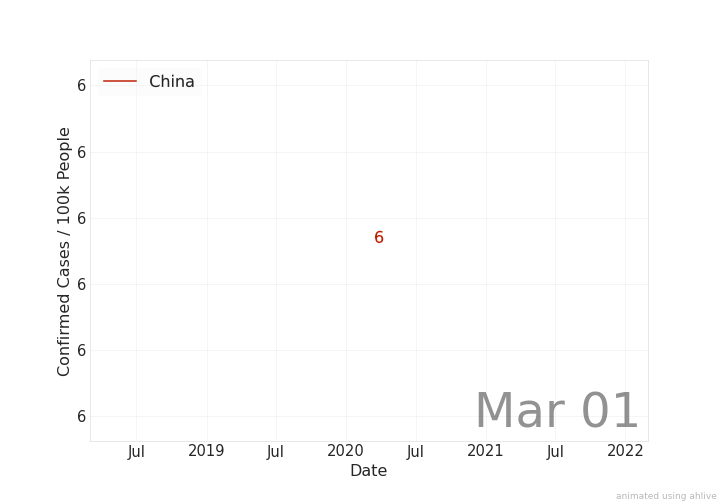

In [16]:
ah_df = ah.DataFrame(
    df_sort, 'Date', 'Cases', label='Country/Region',
    state_labels='Date', inline_labels='Cases',
    figsize=(10, 7), ylabel='Confirmed Cases / 100k People',
    join='cascade', ylims='explore',
    animate='test'
)
ah_df.render()

Let's add a title and cite the data! We can also use multiple processors!

/mnt/c/Users/sephi/GOOGLE~1/Bash/ahlive/ahlive/animation.py:1372: UserWarning: Attempting to set identical left == right == 18322.0 results in singular transformations; automatically expanding.
  getattr(ax, f"set_{axis}lim")(to_pydt(axis_lim0, axis_lim1))
/mnt/c/Users/sephi/GOOGLE~1/Bash/ahlive/ahlive/animation.py:1372: UserWarning: Attempting to set identical bottom == top == 5.750079094733517 results in singular transformations; automatically expanding.
  getattr(ax, f"set_{axis}lim")(to_pydt(axis_lim0, axis_lim1))


[########################################] | 100% Completed |  1.8s



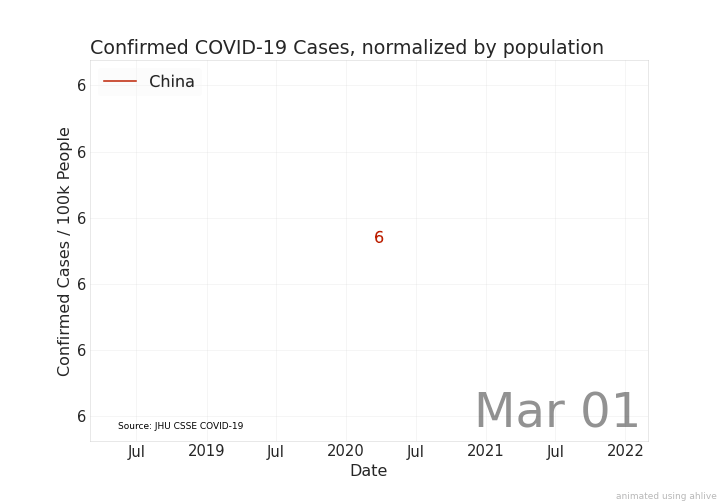

In [17]:
ah_df = ah.DataFrame(
    df_sort, 'Date', 'Cases', label='Country/Region',
    state_labels='Date', inline_labels='Cases',
    figsize=(10, 7), ylabel='Confirmed Cases / 100k People',
    join='cascade', ylims='explore',
    title='Confirmed COVID-19 Cases, normalized by population',
    note='Source: JHU CSSE COVID-19',
    scheduler='processes', workers=4,
    animate='test'
)
ah_df.render()

### final animation

There are many ways we can customize this like setting `inline_labels='Country/Region'` and chaining a `reference`. Lastly, we can also slow down the animation by setting a higher `frames` per state.

[##########################              ] | 65% Completed | 48.3s

/mnt/c/Users/sephi/GOOGLE~1/Bash/ahlive/ahlive/animation.py:1372: UserWarning: Attempting to set identical left == right == 18322.0 results in singular transformations; automatically expanding.
  getattr(ax, f"set_{axis}lim")(to_pydt(axis_lim0, axis_lim1))


[########################################] | 100% Completed |  1min 14.5s



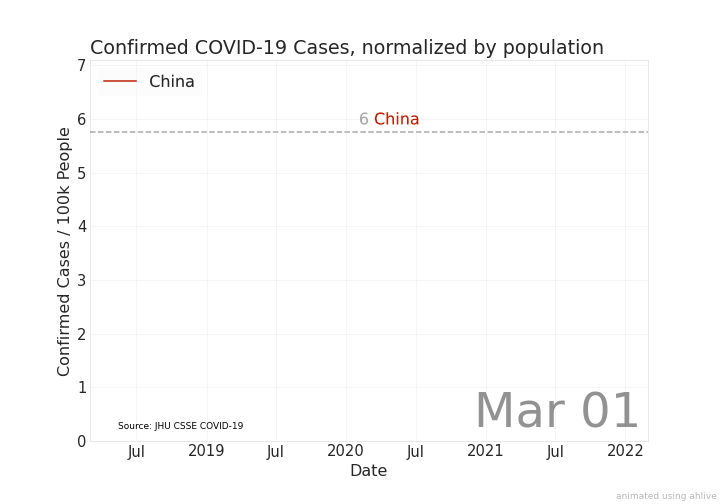

In [18]:
ah_df = ah.DataFrame(
    df_sort, 'Date', 'Cases', label='Country/Region',
    state_labels='Date', inline_labels='Country/Region',
    figsize=(10, 7), ylabel='Confirmed Cases / 100k People',
    join='cascade', ylim1s='explore_0.01',
    title='Confirmed COVID-19 Cases, normalized by population',
    note='Source: JHU CSSE COVID-19',
    scheduler='processes', workers=4, frames=2
).reference(y0s='y', inline_labels='y')
ah_df.render()

That's about it for this tutorial. See the next tutorial to see how to create a bar chart race.

### full code

```python
import ahlive as ah
import pandas as pd

# load dataset
df = ah.tutorial.open_dataset('covid19_global_cases', raw=True, verbose=True)

# transform to tidy format
df_tidy = df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
    var_name='Date', value_name='Cases')

# subset countries
countries = ['US', 'China', 'New Zealand', 'United Kingdom',
             'Brazil', 'India', 'Zambia', 'Pakistan']
df_subset = df_tidy.loc[df_tidy['Country/Region'].isin(countries)]

# find total cases per country instead of province/region
df_countries = df_subset.groupby(['Date', 'Country/Region'])[['Cases']].sum().reset_index()

# convert to datetime
df_dts = df_countries.copy()
df_dts['Date'] = pd.to_datetime(df_dts['Date'])
df_dts = df_dts.loc[
    (df_dts['Date'] >= '2020-03-01') &
    (df_dts['Date'] <= "2020-08-31")
]
df_dts = df_dts.groupby([
    pd.Grouper(key='Date', freq='7D'), 'Country/Region'
])['Cases'].last().reset_index()

# scale by a million
df_scale = df_dts.sort_values('Date')
df_scale['Cases'] /= 1e6

# normalize by population
df_pop = ah.tutorial.open_dataset('covid19_population')[['combined_key', 'population']]
df_norm = df_scale.merge(df_pop, left_on='Country/Region', right_on='combined_key')
df_norm['Cases'] = df_norm['Cases'] * 1e6 / df_norm['population']  # previously scaled by 1 million
df_norm['Cases'] *= 1e5  # scale by per 100k people

# sort by cases
ordering = df_norm.groupby('Country/Region').max().sort_values('Cases').index
df_sort = df_norm.copy()
df_sort['Country/Region'] = pd.Categorical(
    df_sort['Country/Region'], categories=ordering, ordered=True)
df_sort = df_sort.sort_values(['Country/Region', 'Date'])

# render
ah_df = ah.DataFrame(
    df_sort, 'Date', 'Cases', label='Country/Region',
    state_labels='Date', inline_labels='Country/Region',
    figsize=(10, 7), ylabel='Confirmed Cases / 100k People',
    join='cascade', ylim1s='explore_1',
    title='Confirmed COVID-19 Cases, normalized by population',
    note='Source: JHU CSSE COVID-19',
    scheduler='processes', workers=4
).reference(y0s='y', inline_labels='y')
ah_df.render()
```